In [1]:
!pip3 install pandas umap-learn matplotlib seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
#import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

# <font color='#3c3c3c'>Introduction</font>

text

# <font color='#3c3c3c'>EDA</font>

The first step we took was to find out some basic information about our dataset, such as the shape of the dataset, and the names of the columns available. We find out the number of rows and columns we have to gain a general overview of what data we have to analyze.

These are some general summary statistics about the data set. Some key observations include:
22,145 individual tracks 
18 features
10 numerical features
1 integer value (popularity)
7 categorical features 
0 duplicate entries
1 rows with a single missing value


From this initial exploration, we know that we have a very clean dataset with minimal missing values and no duplicate columns. This reduces the necessity for very intense data cleaning as the dataset is already relatively high quality. We can also note that the majority of features are continuous variables that represent Spotify's analysis metrics such as ‘energy’ and ‘danceability’. This is a positive, since it is ideal for modeling mood classification. We also know that since the dataset is very large, it is likely that the model will generalize well across different genres and moods. 

In [10]:
df = pd.read_csv("SpotifyFeatures.csv")
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
# basic info about the dataset
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns)

Dataset Shape: (232725, 18)

Column Names:
 Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [5]:
# check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


In [6]:
# summary statistics
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


<Axes: >

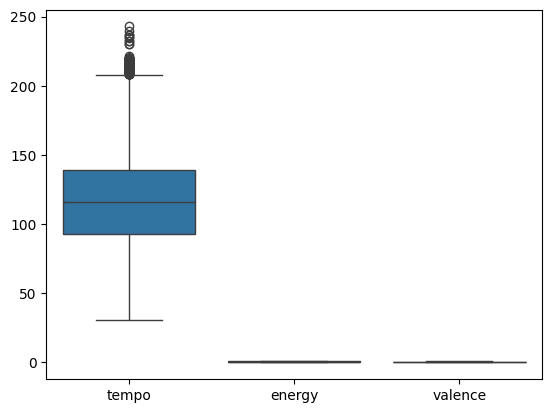

In [11]:
# Duplicate tracks
df.duplicated().sum()

# Outlier detection
sns.boxplot(data=df[['tempo', 'energy', 'valence']])


In [15]:
audio_features = ['valence', 'energy', 'danceability', 'acousticness', 'tempo', 'liveness', 'speechiness', 'instrumentalness', 'loudness']


Valence Distribution

The plot below shows the distribution of the valence feature. This feature measures how happy and cheerful a song sounds. These values range from 0.0 (very sad and negative) to 1.0 (very happy and positive). We can observe that there is a spike near 0.0, which means that there is a high number of sad songs (low valence songs). Aside from that, the distribution is fairly uniform between 0.1 until 0.8. This indicates that the majority of the songs span across a broad emotional range. We can also note that there is a noticeable drop at 1.0, meaning that there are few songs with a truly happy or upbeat emotional tone. In addition, the skewness of 0.14, indicates that distribution is nearly symmetric, with only a very slight right skew that indicates there are more high valence songs than low valence near the tail. The kurtosis of -1.01 also highlights that the valence values are well distributed, as it means that our distribution is flatter than normal with lighter tails (so values are evenly spread out).

This distribution also highlights a possible mood labeling strategy that would quantify the emotional positivity or negativity of a song depending on our scale from 0 to 1. Since we have yet to explore the rest of the features though, this remains just an initial proposal. 


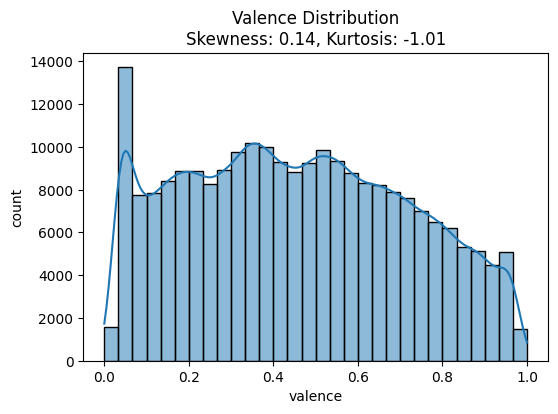

In [28]:
from scipy.stats import skew, kurtosis

# Calculate stats
valence_skew = skew(df['valence'], nan_policy='omit')
valence_kurtosis = kurtosis(df['valence'], nan_policy='omit')

# Plot
plt.figure(figsize=(6, 4))
sns.histplot(df['valence'], kde=True, bins=30)
plt.title(f'Valence Distribution\nSkewness: {valence_skew:.2f}, Kurtosis: {valence_kurtosis:.2f}')
plt.xlabel('valence')
plt.ylabel('count')
plt.show()


The energy distribution is slightly left-skewed, with the highest frequency of values around 10,000 and the lowest around 4,500. The skewness of -0.40 confirms this leftward skew, meaning there are more high-energy values than low-energy values. We also printed the kurtosis value to better understand the shape of the distribution, -0.81. Since it is less than 0 then this means that it has a flatter peak and less outliers (extreme valies) than a normal distribution, making the overall distribution more spread out.

In the context of our model's objective, understanding the distribution of the song's energy is probably a strong predictor for mood since high-energy songs tend to be "happy" while low-energy songs tend to be sad. Results show that most songs in the dataset are moderately to highly energetic, which suggests the model will be trained on a dataset biased toward more upbeat or intense moods. So, we need to keep an eye out to handle this during the training. Despite the imbalance, the feature appears to be useful and unlikely to mislead the model due to noise or outliers.

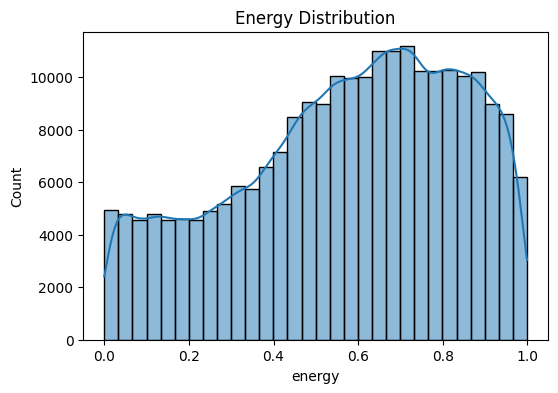

In [10]:
plt.figure(figsize=(6, 4))
sns.histplot(df['energy'], kde=True, bins=30)
plt.title('Energy Distribution')
plt.show()


In [7]:
print("Skewness:", df['energy'].skew())
print("Kurtosis:", df['energy'].kurt())

Skewness: -0.40022327921151274
Kurtosis: -0.8135949529345483


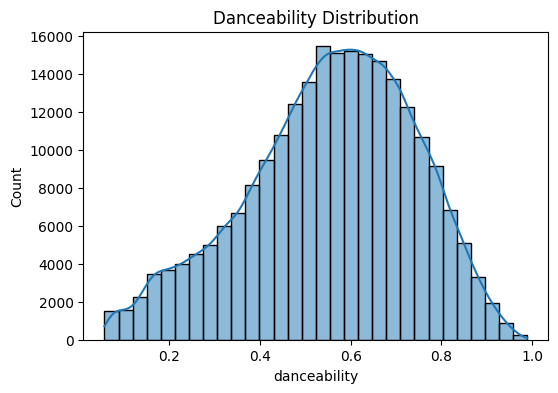

In [11]:
plt.figure(figsize=(6, 4))
sns.histplot(df['danceability'], kde=True, bins=30)
plt.title('Danceability Distribution')
plt.show()


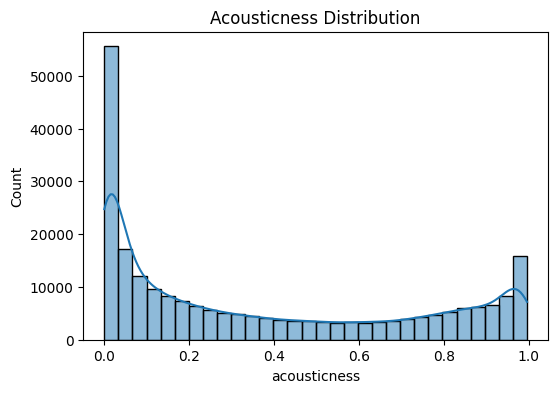

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(df['acousticness'], kde=True, bins=30)
plt.title('Acousticness Distribution')
plt.show()


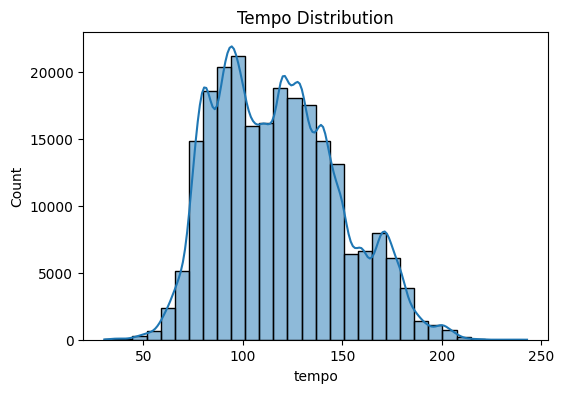

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(df['tempo'], kde=True, bins=30)
plt.title('Tempo Distribution')
plt.show()


Liveness Distribution

Liveness is measuring the prescence of a live audience or live performance characteristics in a track, going from 0.0 to 1.0.  
The graph shows a strong positive skew since most values have a liveness close to 0, meaning a majority of tracks are studio recorded, not live. This is reinforced with the skewness of 2.07 (which implies a strong positive skew). The kurtosis of 3.89 indicates a high peak around 0.1 and a heavier tail, meaning that few songs deviate strongly from the norm. Since this distribution is highly skewed, using it in the model without any type of scaling or transformation could hurt performance. This is something we will take into account in future steps. From this graph, we can also conclude that liveness is likely not particularly useful when detecting mood since most values are concentrated under 0.3. 

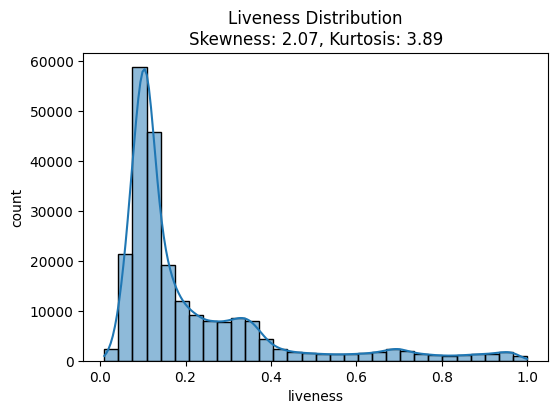

In [ ]:
# Calculate skewness and kurtosis for liveness
liveness_skew = skew(df['liveness'], nan_policy='omit')
liveness_kurt = kurtosis(df['liveness'], nan_policy='omit')

# Plot
plt.figure(figsize=(6, 4))
sns.histplot(df['liveness'], kde=True, bins=30)
plt.title(f'Liveness Distribution\nSkewness: {liveness_skew:.2f}, Kurtosis: {liveness_kurt:.2f}')
plt.xlabel('liveness')
plt.ylabel('count')
plt.show()


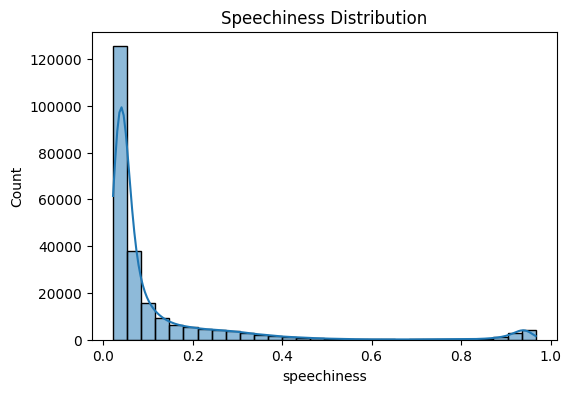

In [15]:
plt.figure(figsize=(6, 4))
sns.histplot(df['speechiness'], kde=True, bins=30)
plt.title('Speechiness Distribution')
plt.show()

Now, to further analyze the relationship between the features, we have decided to print a correlation map since it's the easiest to visualize. If we consider those positive or negatives values greater than 0.6, then the graph shows three strong correlations. 
- **loudness vs acousticness (-0.69)**: This means that as the loudness of a track increases (strong negative correlation), the acousticness tends to decrease, and vice versa. In the context our model, this helps us better understand how "intense" or "natural" a song is. We could potentially remove one to decrease the number of features, but we beleive both are revelant since they describe different things.

- **energy vs acousticness (-0.73)**: This means that as the energy increases the acousticness decreases (strong negative correlation). Which makes sense since high-energy music often involves more synthesized or amplified sounds, whereas acoustic music tends to be calmer, with less energy.  This relationship reinforces the idea that energy could be an important feature for predicting moods like excited, angry, or happy, while acousticness might be more relevant for moods like calm or sad. Additionally, this is similar to the previous relationship, where we are not sure we should remove one or the other becuase both feature describe different things and can help predict different moods that are similar to just "happy" or "sad".

- **energy vs loudness (0.82)**: This means that as energy increases, so does the loudness (strong postive correlation). This is expected, as more intense and energetic music often has higher volumes and more dynamic sound. Since these features are more related to each other in terms of what they describe, typically upbeat, excited, or happy moods, maybe it we could drop one. 

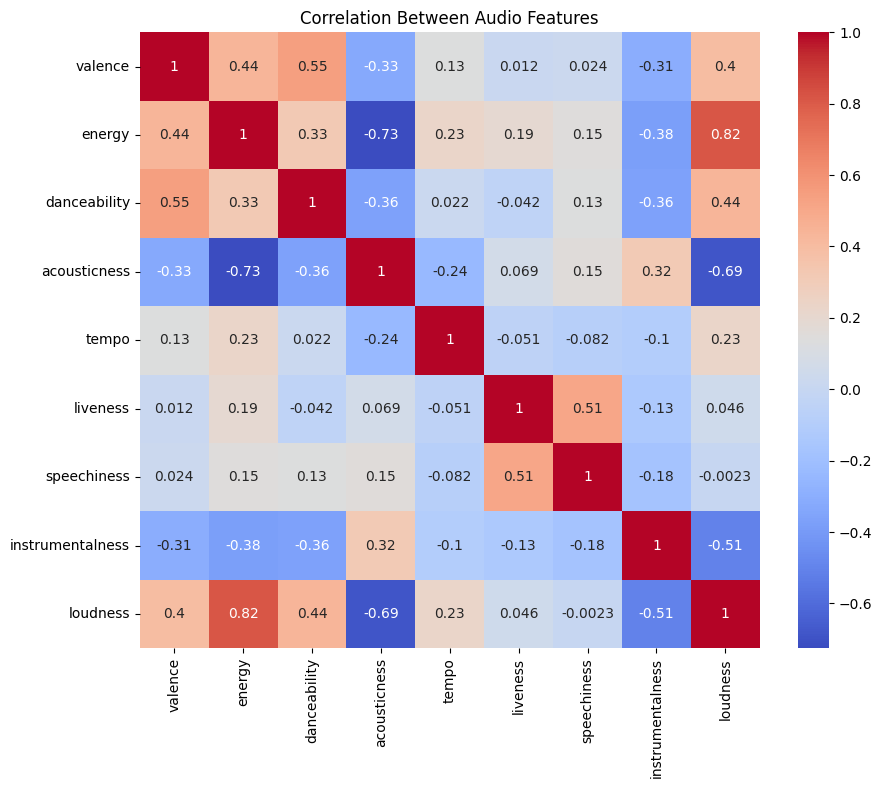

In [16]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df[audio_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Audio Features')
plt.show()


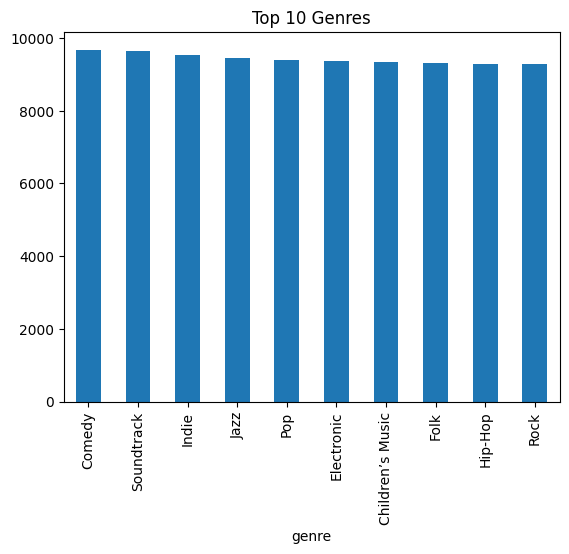

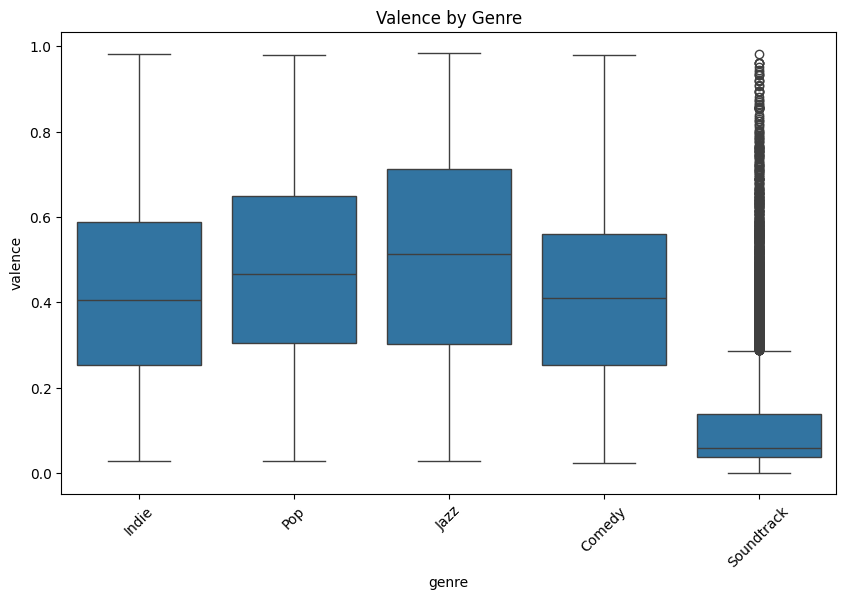

In [17]:
df['genre'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Genres')
plt.show()

# Boxplots of valence by genre
top_genres = df['genre'].value_counts().head(5).index
subset = df[df['genre'].isin(top_genres)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='genre', y='valence', data=subset)
plt.title('Valence by Genre')
plt.xticks(rotation=45)
plt.show()

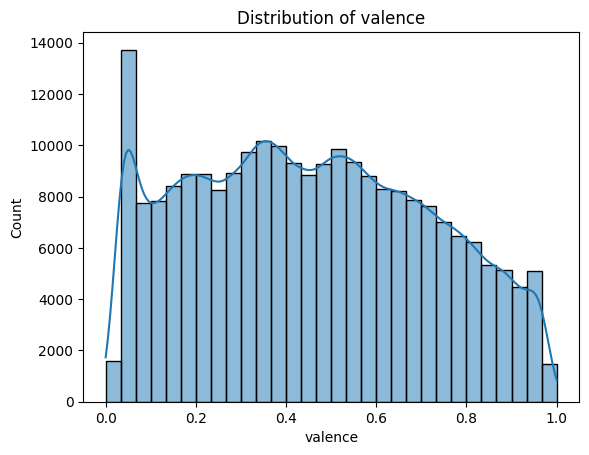

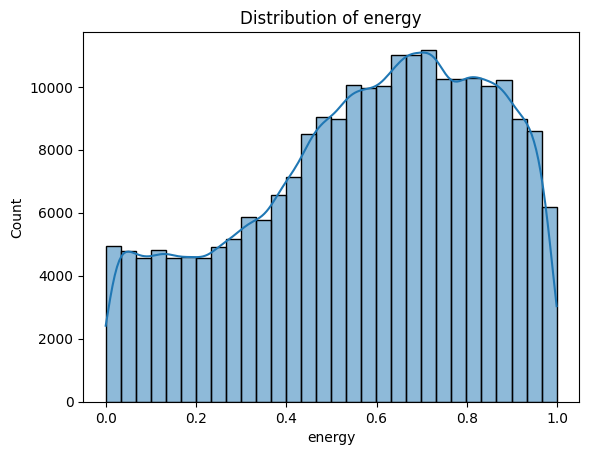

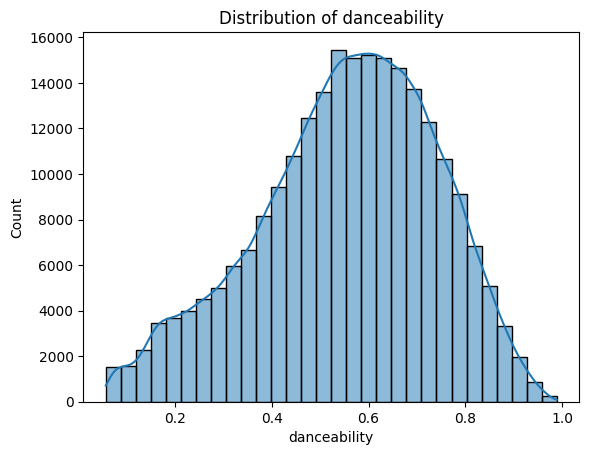

In [18]:
for feature in ['valence', 'energy', 'danceability']:
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

# <font color='#3c3c3c'>EDA-2</font>

In [19]:
features = ['valence', 'energy', 'danceability', 'acousticness', 'tempo', 'loudness', 
    'speechiness', 
    'instrumentalness', 
    'liveness']

X = df[features]

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [21]:
from sklearn.cluster import KMeans

# Choose number of clusters (let's say 5 moods)
kmeans = KMeans(n_clusters=5, random_state=42)
df['mood_cluster'] = kmeans.fit_predict(X_scaled)

# Now each song is assigned to a "mood cluster"

In [22]:
cluster_summary = df.groupby('mood_cluster')[features].mean()
print(cluster_summary)

               valence    energy  danceability  acousticness       tempo  \
mood_cluster                                                               
0             0.336002  0.332763      0.506147      0.697375  111.752528   
1             0.640722  0.670030      0.704638      0.192694  108.926153   
2             0.155164  0.165379      0.292362      0.844025  102.478091   
3             0.414632  0.663503      0.562818      0.789351   98.023968   
4             0.430969  0.766319      0.503566      0.099973  142.572296   

               loudness  speechiness  instrumentalness  liveness  
mood_cluster                                                      
0            -12.008261     0.065861          0.066356  0.178686  
1             -7.041822     0.104922          0.059300  0.172583  
2            -20.922792     0.045696          0.740426  0.146678  
3            -11.988400     0.877456          0.001191  0.729090  
4             -5.947786     0.093683          0.091934  0.244200 

In [23]:
cluster_to_mood = {
    0: 'Happy Party',
    1: 'Sad Acoustic',
    2: 'Chill Vibes',
    3: 'Energetic',
    4: 'Mellow'
}

df['mood'] = df['mood_cluster'].map(cluster_to_mood)

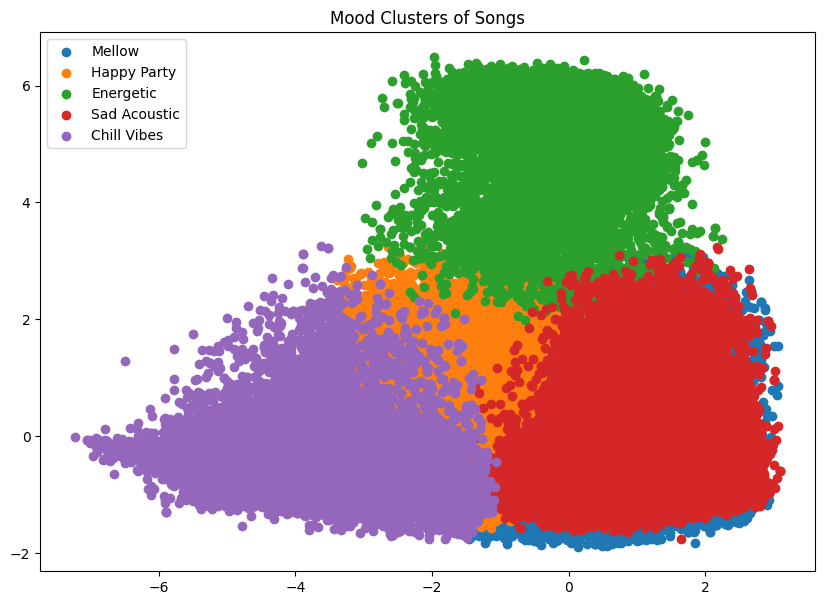

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df['pca1'] = components[:, 0]
df['pca2'] = components[:, 1]

plt.figure(figsize=(10,7))
for mood in df['mood'].unique():
    subset = df[df['mood'] == mood]
    plt.scatter(subset['pca1'], subset['pca2'], label=mood)
    
plt.legend()
plt.title('Mood Clusters of Songs')
plt.show()

/Users/gabyvega/ExpenseManagement/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/gabyvega/ExpenseManagement/.venv/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/gabyvega/ExpenseManagement/.venv/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/gabyvega/ExpenseManagement/.venv/lib/python3.13/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  wa

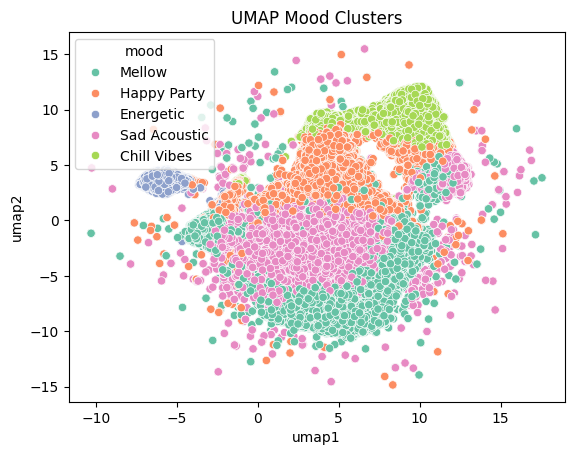

In [25]:
import umap.umap_ as umap

reducer = umap.UMAP(random_state=42)
X_umap = reducer.fit_transform(X_scaled)

df['umap1'] = X_umap[:, 0]
df['umap2'] = X_umap[:, 1]

sns.scatterplot(x='umap1', y='umap2', hue='mood', data=df, palette='Set2')
plt.title("UMAP Mood Clusters")
plt.show()

In [26]:
from sklearn.metrics import silhouette_score

# X_scaled = your standardized audio features
score = silhouette_score(X_scaled, df['mood_cluster'])
print(f"Silhouette Score: {score:.2f}")

KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import davies_bouldin_score

score = davies_bouldin_score(X_scaled, df['mood_cluster'])
print(f"Davies-Bouldin Index: {score:.2f}")

In [ ]:
from sklearn.metrics import calinski_harabasz_score

score = calinski_harabasz_score(X_scaled, df['mood_cluster'])
print(f"Calinski-Harabasz Index: {score:.2f}")

# <font color='#3c3c3c'>Handling Missing values</font>

# <font color='#3c3c3c'>Data Splitting</font>

# <font color='#3c3c3c'>Data Imputation</font>

# <font color='#3c3c3c'>Creating New Features</font>

# <font color='#3c3c3c'>Encoding Categorical Variables</font>

# <font color='#3c3c3c'>Feature Scaling</font>

# <font color='#3c3c3c'>Adressing Class Imbalance</font>

# <font color='#3c3c3c'>Feature Selection</font>

# <font color='#3c3c3c'>Baseline</font>